In [61]:
print("K-Means")

import gensim 
import gensim.models.keyedvectors as word2vec
w2v_model = word2vec.KeyedVectors.load('w2v.model')

vocabulary = []
for word in w2v_model.index_to_key:
    vocabulary.append(word)
print(len(vocabulary))

K-Means
173444


In [148]:
content = """
Trong cuộc gặp ngày 16-9, ông Modi nói với ông Putin rằng bây giờ không phải là thời điểm cho chiến tranh, trong khi an ninh lương thực, phân bón và nhiên liệu mới là những mối quan tâm lớn của thế giới hiện nay.

"Tôi biết rằng thời nay không phải là thời đại của chiến tranh và tôi đã nói với ông qua điện thoại về điều này", ông Modi nói bên lề hội nghị thượng đỉnh SCO ở Uzbekistan.

Đáp lại, ông Putin cho biết ông hiểu những lo ngại của ông Modi về cuộc chiến ở Ukraine. "Tôi biết lập trường của ông về cuộc xung đột ở Ukraine và tôi biết về mối quan tâm của ông. Chúng tôi muốn tất cả chuyện này kết thúc càng sớm càng tốt", ông Putin nói.

Theo Hãng tin AFP, Ấn Độ và Nga có mối quan hệ lâu dài từ thời chiến tranh lạnh và cho tới nay, Nga vẫn là nhà cung cấp vũ khí lớn nhất của Ấn Độ.

Ấn Độ cũng được cho là né tránh việc lên án Nga về cuộc chiến với Ukraine khiến giá dầu và các mặt hàng khác tăng vọt.

Ngày 15-9, Tổng thống Nga Vladimir Putin và Chủ tịch Trung Quốc Tập Cận Bình đã có cuộc gặp song phương cũng trong khuôn khổ hội nghị thượng đỉnh SCO ở Uzbekistan.

Khi đó, ông Putin thừa nhận Trung Quốc có "quan ngại" về cuộc xung đột ở Ukraine. Tổng thống Nga cho biết bản thân đã tìm cách giải quyết những lo ngại của Bắc Kinh ngay từ những ngày đầu.

Theo ông Putin, Matxcơva đánh giá cao lập trường cân bằng của Bắc Kinh về cuộc khủng hoảng này. Tổng thống Nga cũng cho biết Điện Kremlin sẽ làm rõ lập trường của mình về Ukraine, nhưng không giải thích thêm.

Cũng trong cuộc gặp, ông Tập nói với Tổng thống Putin rằng Trung Quốc sẵn sàng hợp tác với Nga "trong việc mở rộng sự ủng hộ mạnh mẽ cho nhau về các vấn đề liên quan lợi ích cốt lõi của hai bên".
"""

contents_parsed = content.lower() 
contents_parsed = contents_parsed.replace('\n', ' ')
contents_parsed = contents_parsed.strip() 

import nltk
sentences = nltk.sent_tokenize(contents_parsed)

i = 0
for sentence in sentences:
    print(i,"===", sentence)
    i += 1

0 === trong cuộc gặp ngày 16-9, ông modi nói với ông putin rằng bây giờ không phải là thời điểm cho chiến tranh, trong khi an ninh lương thực, phân bón và nhiên liệu mới là những mối quan tâm lớn của thế giới hiện nay.
1 === "tôi biết rằng thời nay không phải là thời đại của chiến tranh và tôi đã nói với ông qua điện thoại về điều này", ông modi nói bên lề hội nghị thượng đỉnh sco ở uzbekistan.
2 === đáp lại, ông putin cho biết ông hiểu những lo ngại của ông modi về cuộc chiến ở ukraine.
3 === "tôi biết lập trường của ông về cuộc xung đột ở ukraine và tôi biết về mối quan tâm của ông.
4 === chúng tôi muốn tất cả chuyện này kết thúc càng sớm càng tốt", ông putin nói.
5 === theo hãng tin afp, ấn độ và nga có mối quan hệ lâu dài từ thời chiến tranh lạnh và cho tới nay, nga vẫn là nhà cung cấp vũ khí lớn nhất của ấn độ.
6 === ấn độ cũng được cho là né tránh việc lên án nga về cuộc chiến với ukraine khiến giá dầu và các mặt hàng khác tăng vọt.
7 === ngày 15-9, tổng thống nga vladimir putin 

In [149]:
from pyvi import ViTokenizer
import numpy as np 

X = []
for sentence in sentences:
    
    # sentence = gensim.utils.simple_preprocess(sentence)
    # sentence = ' '.join(sentence)
    sentence_tokenized = ViTokenizer.tokenize(sentence)
    # print(sentence_tokenized)
    words = sentence_tokenized.split(" ")
    sentence_vec = np.zeros((128))
    for word in words:
        if word in vocabulary:
            sentence_vec+=w2v_model[word]
    X.append(sentence_vec)

print(len(X))

13


In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans = kmeans.fit(X)

print("K-Means Clustering\n")
avg = []
for j in range(n_clusters):
    print("Cụm", j+1)
    idx = np.where(kmeans.labels_ == j)[0]
    print(idx)
    avg.append(np.mean(idx))
    print("Thứ tự trung bình: ", round(np.mean(idx), 2))
    print("="*115)
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
print("Các câu gần", n_clusters, "tâm cụm nhất",closest)
ordering = sorted(range(n_clusters), key=lambda k: avg[k])
# print(ordering)
print("\nKết quả tóm tắt:\n")
summary = ' '.join(["(Câu " + str(closest[idx]) + ") " + sentences[closest[idx]] for idx in ordering])
print(summary)

K-Means Clustering

Cụm 1
[ 2  3  4  6  8  9 10 11]
Thứ tự trung bình:  6.62
Cụm 2
[ 0  1  5 12]
Thứ tự trung bình:  4.5
Cụm 3
[7]
Thứ tự trung bình:  7.0
Các câu gần 3 tâm cụm nhất [2 0 7]

Kết quả tóm tắt:

(Câu 0) trong cuộc gặp ngày 16-9, ông modi nói với ông putin rằng bây giờ không phải là thời điểm cho chiến tranh, trong khi an ninh lương thực, phân bón và nhiên liệu mới là những mối quan tâm lớn của thế giới hiện nay. (Câu 2) đáp lại, ông putin cho biết ông hiểu những lo ngại của ông modi về cuộc chiến ở ukraine. (Câu 7) ngày 15-9, tổng thống nga vladimir putin và chủ tịch trung quốc tập cận bình đã có cuộc gặp song phương cũng trong khuôn khổ hội nghị thượng đỉnh sco ở uzbekistan.


In [151]:
summary2 = ' '.join([sentences[closest[idx]] for idx in ordering])
summary2 = '. '.join(map(lambda s: s.strip().capitalize(), summary2.split('.')))
print(summary2)

Trong cuộc gặp ngày 16-9, ông modi nói với ông putin rằng bây giờ không phải là thời điểm cho chiến tranh, trong khi an ninh lương thực, phân bón và nhiên liệu mới là những mối quan tâm lớn của thế giới hiện nay. Đáp lại, ông putin cho biết ông hiểu những lo ngại của ông modi về cuộc chiến ở ukraine. Ngày 15-9, tổng thống nga vladimir putin và chủ tịch trung quốc tập cận bình đã có cuộc gặp song phương cũng trong khuôn khổ hội nghị thượng đỉnh sco ở uzbekistan. 


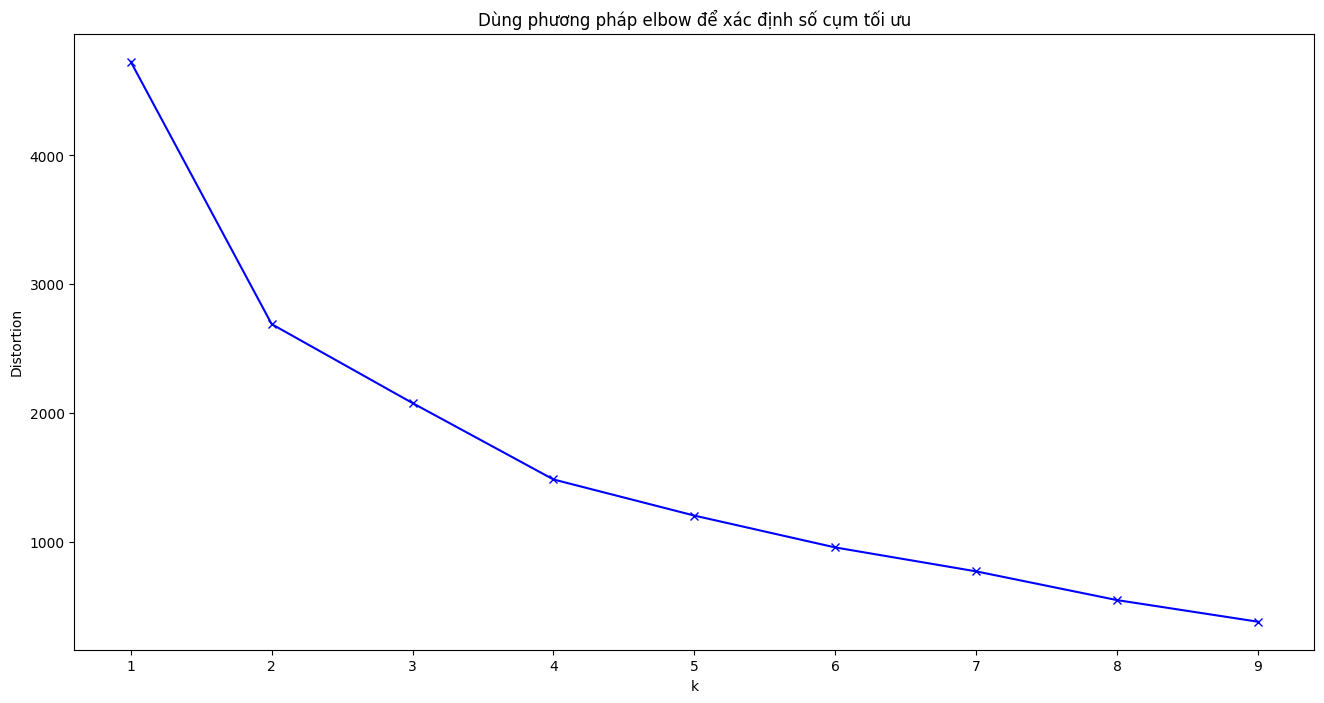

In [153]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Dùng phương pháp elbow để xác định số cụm tối ưu')
plt.show()

In [111]:
def configureApp():
    for i in range(0, 4):
        window.columnconfigure(i, weight=2, minsize=50)
    for i in range(1, 7):
        window.rowconfigure(i, weight=2, minsize=50)
    #Layout column 0
    GeneralLabel.grid(row=0, column=0,columnspan=3)
    InputLabel.grid(row=1, column=0)
    InputTextBox.grid(row=2, column=0, rowspan = 7)
    
    #Layout column 1
    SoCauLabel.grid(row = 1, column = 1)
    ChonCumButton.grid(row = 2, column = 1)
    SoCumLabel.grid(row = 3,column = 1)
    ChonCumTextBox.grid(row = 4, column = 1, sticky=N)
    TomTatVanBanButton.grid(row = 5,column = 1)
    
    #Layout column 2
    OutputLabel.grid(row=1, column=2)
    OutputTextBox.grid(row=2, column=2, rowspan = 7)

In [156]:
def TrackingSentences(value=None):
    TextInput = str(InputTextBox.get(1.0, END + "-1c"))
    contents_parsed = TextInput.lower() 
    contents_parsed = contents_parsed.replace('\n', ' ')
    contents_parsed = contents_parsed.strip()
    Sentences = nltk.sent_tokenize(contents_parsed)
    SoCauLabel.config(text=f"Số câu văn bản là: {len(Sentences)}")
    InputTextBox.edit_modified(False)

In [157]:
import tkinter as tk
from tkinter import *
window = tk.Tk()
window.title("Vietnamese Text summarization using K-mean by Nguyen Vu Hai")
window.geometry('1280x720')
GeneralLabel = tk.Label(text="Tóm tắt văn bản sử dụng thuật toán kmean-clustering", font=("bold", 23), padx=40, pady=50)

InputLabel = tk.Label(text="Input", font = ("bold",16))
InputTextBox = Text(window, height = 20, width = 40, font = ("bold", 15))
InputTextBox.bind('<<Modified>>', TrackingSentences)

ChonCumButton = tk.Button(window, text="Xem cụm tối ưu",font = ("bold", 13))
SoCauLabel = tk.Label(window, text="Mời nhập văn bản",font = ("bold",16))
# SoCauLabel.trace("w",TrackingSentences)
SoCumLabel = tk.Label(window, text= "Chọn số câu cần tóm tắt (số cụm)",font = ("bold",13))
ChonCumTextBox = Text(window, height = 1, width = 10, padx=5, font = ("bold", 15))
TomTatVanBanButton = tk.Button(window, text="Tiến hành tóm tắt",font = ("bold", 13))

OutputLabel = tk.Label(text = "Output", font = ("bold", 15))
OutputTextBox = Text(window, height = 20, width = 40, font = ("bold", 16))
configureApp()

window.mainloop()

In [9]:
# ThuLabel = tk.Label(text="Lượng thu", font=("bold", 14), padx=40, pady=50, width=20)
# ThuTextBox = Text(window,height=3, width = 40,pady=10,font = ("bold", 20))

# PhatLabel = tk.Label(text="Lượng phát", font=("bold", 14), padx=40, pady=50)
# PhatTextBox = Text(window,height=3, width = 40, pady=10, font = ("bold", 20))

# ChiPhiLabel = tk.Label(text="Ma trận \n chi phí", font=("bold", 14), padx=40, pady=50)
# ChiPhiTextBox = Text(window,height=5, width = 40, pady=10, font = ("bold", 20))

# Calculate = tk.Button(window, text="Tính chi phí tối ưu", font=("bold", 14))

# KetQua = tk.Label(text="Kết quả", font=("bold", 14), padx=40, pady=50)
# KetQuaTextBox = Text(window,height=15, width = 45, pady=10, font= ("normal", 20))

# Clear = tk.Button(window, text="Xóa các ô", font=("bold", 14))
# Help = tk.Button(window, text="Trợ giúp", font=("bold", 14))
# About = tk.Button(window, text="Về chúng tôi", font=("bold", 14))